In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
#load data and set index
universe = pd.read_csv('universe.csv')
df = pd.DataFrame(universe)
df.set_index('ticker', inplace=True)
#fix some columns
df.roa = df.roa.str.replace('%','').astype('float')
df.roe = df.roe.str.replace('%','').astype('float')
df.short_to_float = df.short_to_float.str.replace('%','').astype('float')
df.oper_margin = df.oper_margin.str.replace('%','').astype('float')
df.profit_margin = df.profit_margin.str.replace('%','').astype('float')
df.loc['TSLA','trail_pe'] = 1640
df.trail_pe = df.trail_pe.astype('float')
df.loc['NLOK','px2book'] = 1190
df.px2book = df.px2book.astype('float')
df['ticker2'] = df.index
df['analyst_est'] = ((df['1y_est'] / df['px'])-1)*100
df.perf_1y = df.perf_1y.str.replace('%','').astype('float')

In [116]:
df.employees.median()

20000.0

In [16]:
df.sector.value_counts()

Industrials               73
Technology                71
Financial Services        68
Consumer Cyclical         64
Healthcare                63
Consumer Defensive        34
Utilities                 28
Real Estate               27
Communication Services    26
Energy                    24
Basic Materials           21
Name: sector, dtype: int64

In [17]:
sector_grp = df.groupby(['sector'])

In [ ]:
sector_grp.get_group('Utilities')

In [19]:
sector_grp['industry'].value_counts().loc['Basic Materials']

industry
Specialty Chemicals    7
Chemicals              5
Agricultural Inputs    4
Building Materials     2
Copper                 1
Gold                   1
Steel                  1
Name: industry, dtype: int64

In [ ]:
sector_grp['beta','pe'].agg(['median','mean','count'])

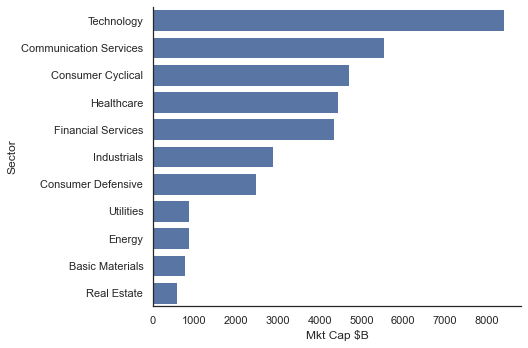

In [88]:
graph = sector_grp['mktcap'].agg(['sum']).sort_values(by='sum',ascending=False)
graph.reset_index(inplace=True)
graph
g = sns.catplot(y="sector",x='sum' ,data=graph, aspect=1.5, kind="bar", color="b")
g.set(xlabel="Mkt Cap $B", ylabel = "Sector")
plt.tight_layout()
plt.savefig('spx_mktcap.png')

# ax = sns.barplot( data=graph)
# g = sns.catplot(y="sector", x='sum', data=graph, aspect=1.5, kind="bar", color="b")

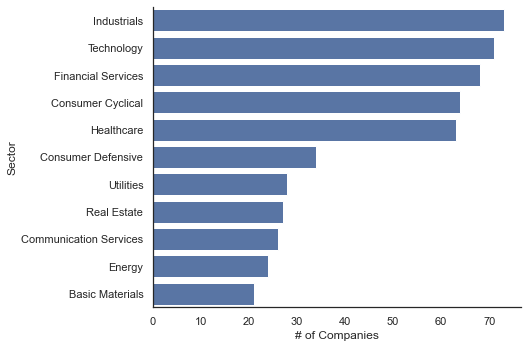

In [89]:
g = sns.catplot(y="sector", data=df, aspect=1.5, kind="count", color="b",order = df['sector'].value_counts().index)
g.set(xlabel="# of Companies", ylabel = "Sector")
plt.tight_layout()
plt.savefig('spx_count.png')
# g.set_xticklabels(rotation=90)

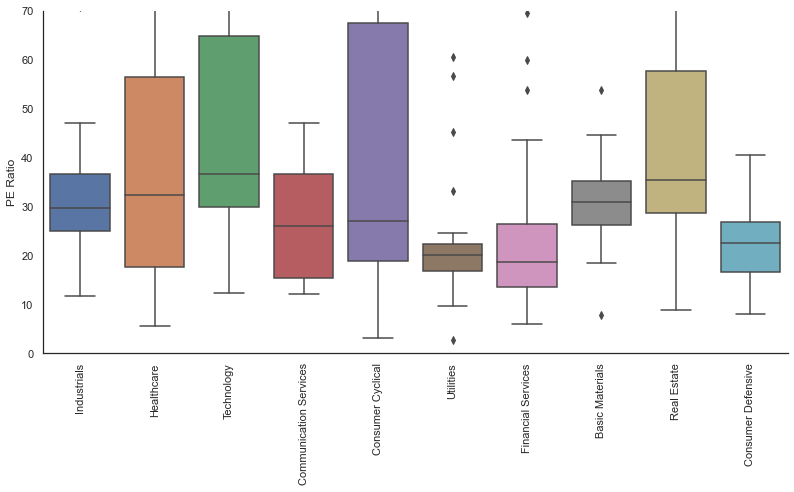

In [106]:
#gtg
filt = df.sector != 'Energy'
df2=df.loc[filt]
# sns.set(font_scale=1)  
sns.set_style("white")
g = sns.catplot(x="sector", y="pe", kind="box", data=df2, height=7, aspect=1.6)
g.set_xticklabels(rotation=90)
g.set(xlabel="", ylabel = "PE Ratio")
plt.ylim(0,70)
plt.tight_layout()
plt.savefig('sector_pe.png')

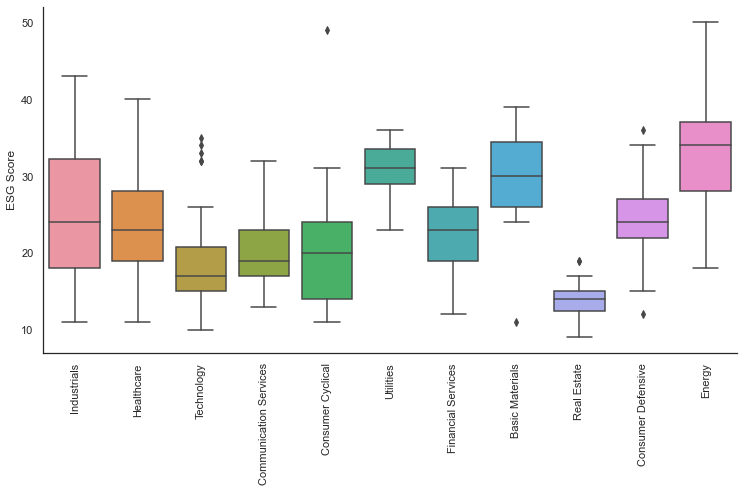

In [105]:
#gtg
g = sns.catplot(x="sector", y="esg_score", kind="box", data=df, height=7, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set(xlabel="", ylabel = "ESG Score")
plt.tight_layout()
plt.savefig('sector_esg.png')
# plt.ylim(-50,100)

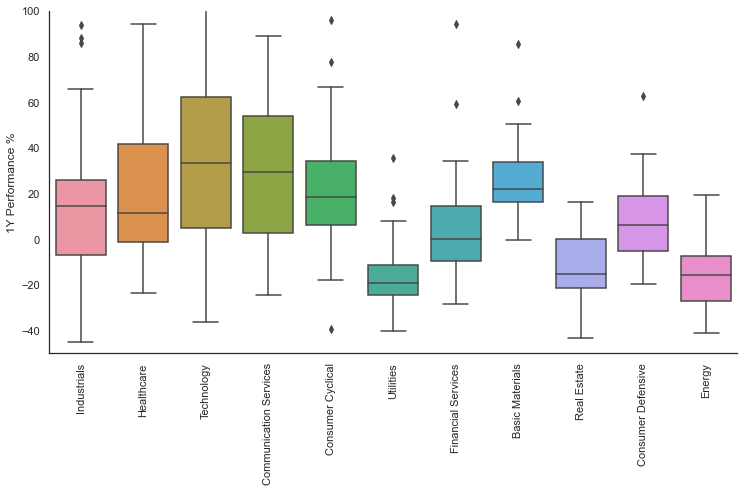

In [102]:
#gtg
g = sns.catplot(x="sector", y="perf_1y", kind="box", data=df, height=7, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set(xlabel="", ylabel = "1Y Performance %")
plt.ylim(-50,100)
plt.tight_layout()
plt.savefig('sector_1yperf.png')

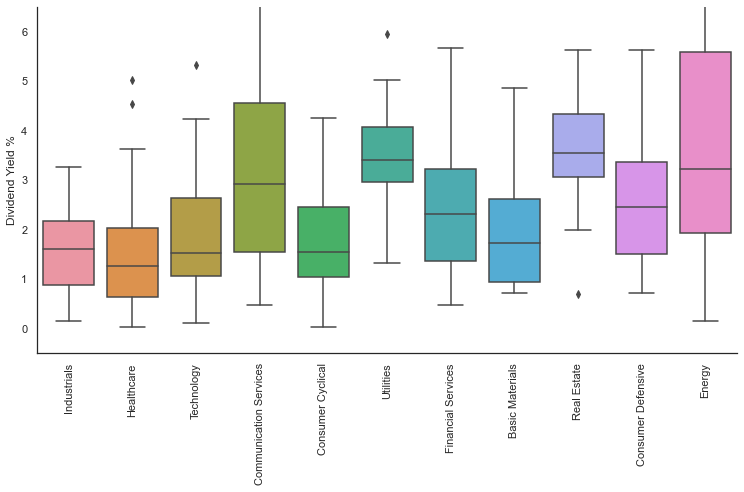

In [97]:
#gtg
g = sns.catplot(x="sector", y="div_yld", kind="box", data=df, height=7, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set(xlabel="", ylabel = "Dividend Yield %")
plt.ylim(-.5,6.5)
plt.tight_layout()
plt.savefig('sector_div.png')

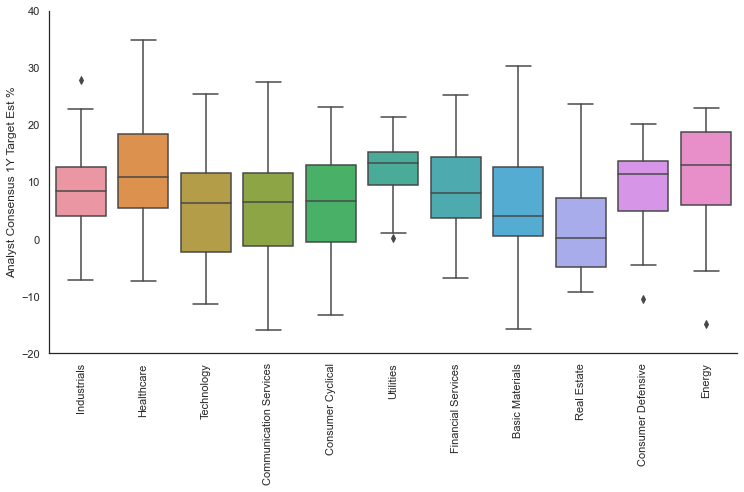

In [93]:
#gtg
g = sns.catplot(x="sector", y="analyst_est", kind="box", data=df, height=7, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set(xlabel="", ylabel = "Analyst Consensus 1Y Target Est %")
plt.ylim(-20,40)
plt.tight_layout()
plt.savefig('sector_1y.png')

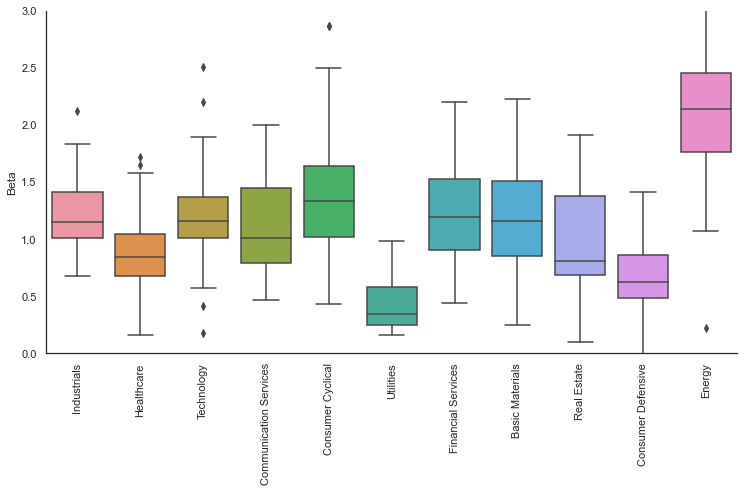

In [103]:
#gtg.  beta by sector
g = sns.catplot(x="sector", y="beta", kind="box", data=df, height=7, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set(xlabel="", ylabel = "Beta")
plt.ylim(-0,3)
plt.tight_layout()
plt.savefig('sector_beta.png')

In [ ]:
# sns.set(font_scale=1.5,style="white")
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="analyst_est",y="sector",data=df,palette=["m", "g"])
plt.xlim(-20,40)
# sns.set_xticklabels(rotation = 90) 
# plt.ylim(-18,45)
sns.despine(offset=10, trim=True)
plt.show()

(-20.0, 40.0)

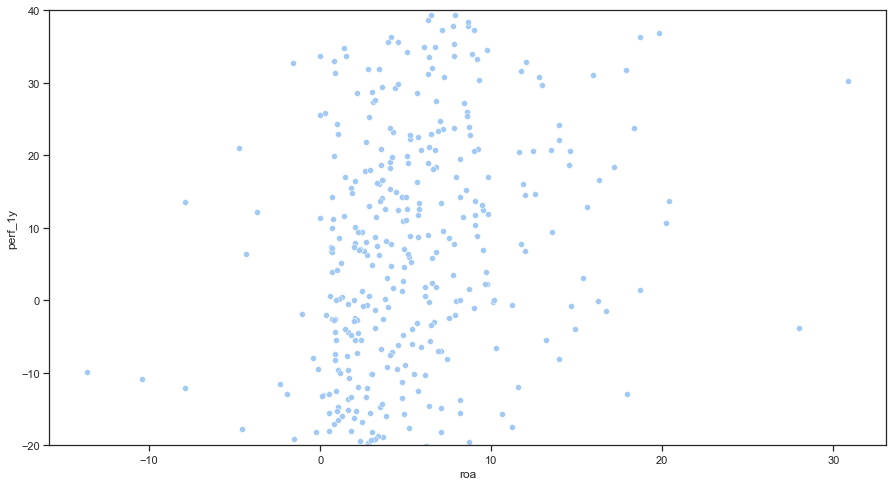

In [206]:
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df, x="roa", y="perf_1y")
plt.ylim(-20,40)

In [ ]:
plt.figure(figsize=(5,5))
df.plot.scatter(x='roe', y='perf_1y',xlim=(-1,30),ylim=(-75,150))
# plt.ylim(-20,100)


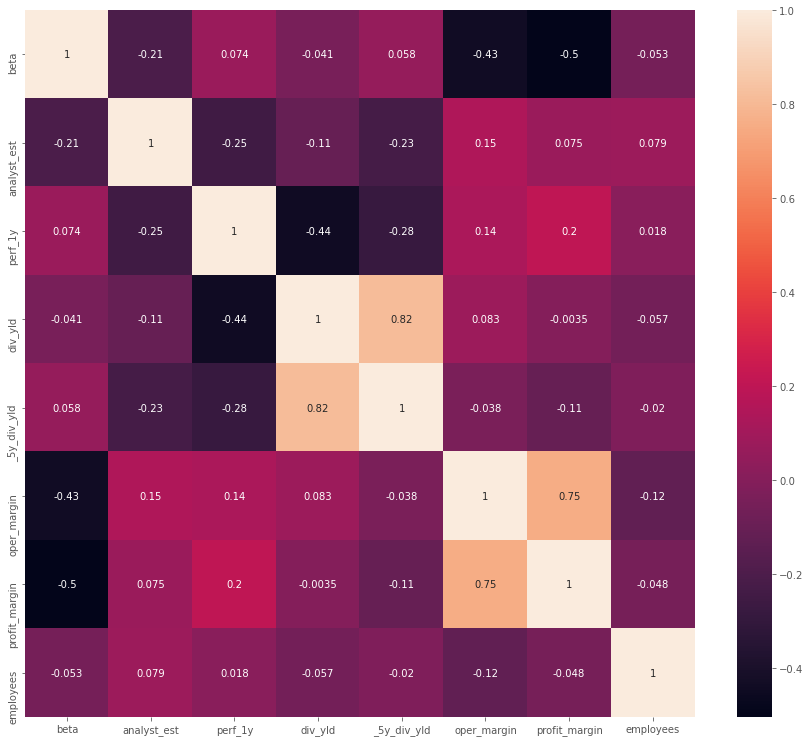

In [38]:
cor = df[['beta','analyst_est','perf_1y','div_yld','_5y_div_yld','oper_margin','profit_margin','employees']]
corrMatrix = cor.corr()
corrMatrix

fig_dims = (15,13)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix, annot=True)
plt.show()

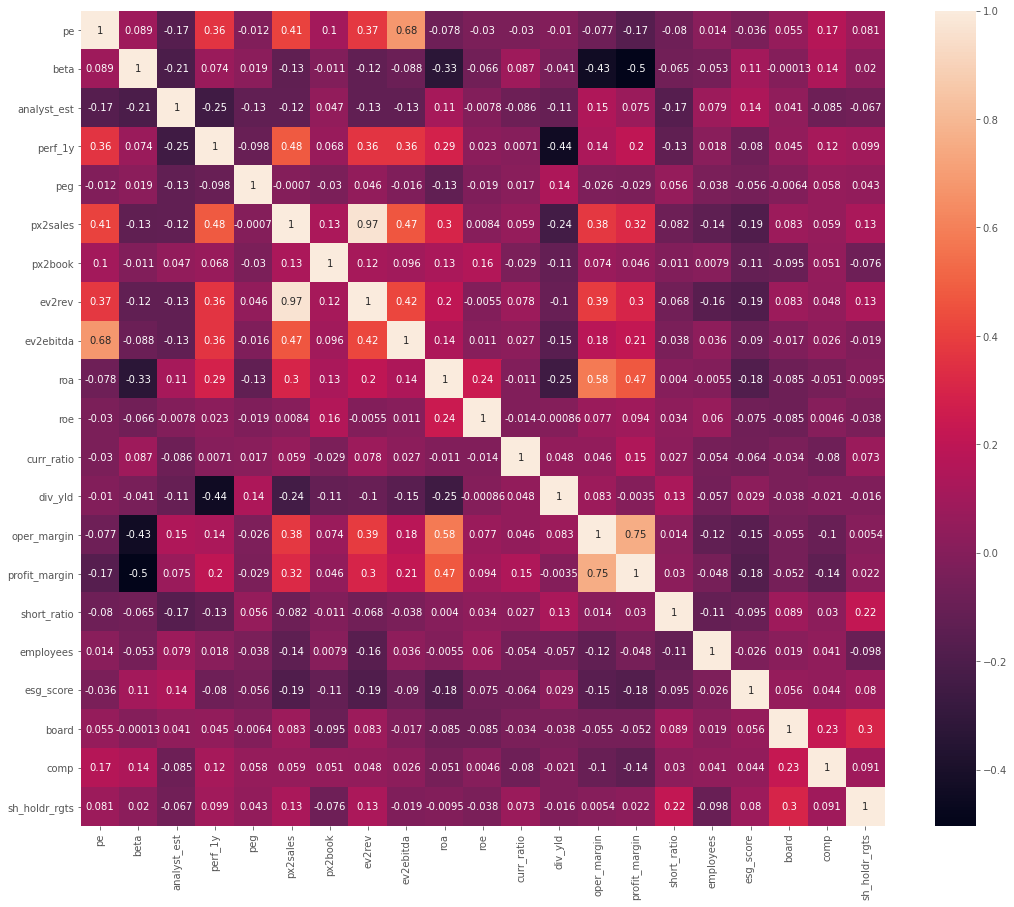

In [37]:
cor = df[['pe','beta','analyst_est','perf_1y','peg','px2sales','px2book','ev2rev','ev2ebitda','roa','roe',\
          'curr_ratio','debt_to_eq','div_yld','oper_margin','profit_margin','short_ratio','employees',\
          'esg_score','board','comp','sh_holdr_rgts']]
corrMatrix = cor.corr()
corrMatrix

fig_dims = (18,15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix, annot=True)
plt.show()

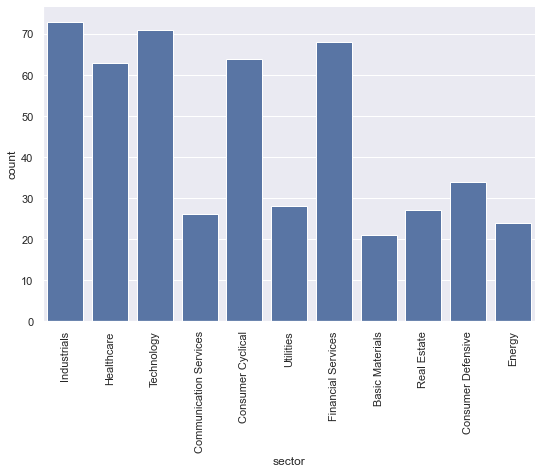

In [152]:
g = sns.catplot(x="sector", data=df, aspect=1.5, kind="count", color="b")
g.set_xticklabels(rotation=90)

In [ ]:


corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

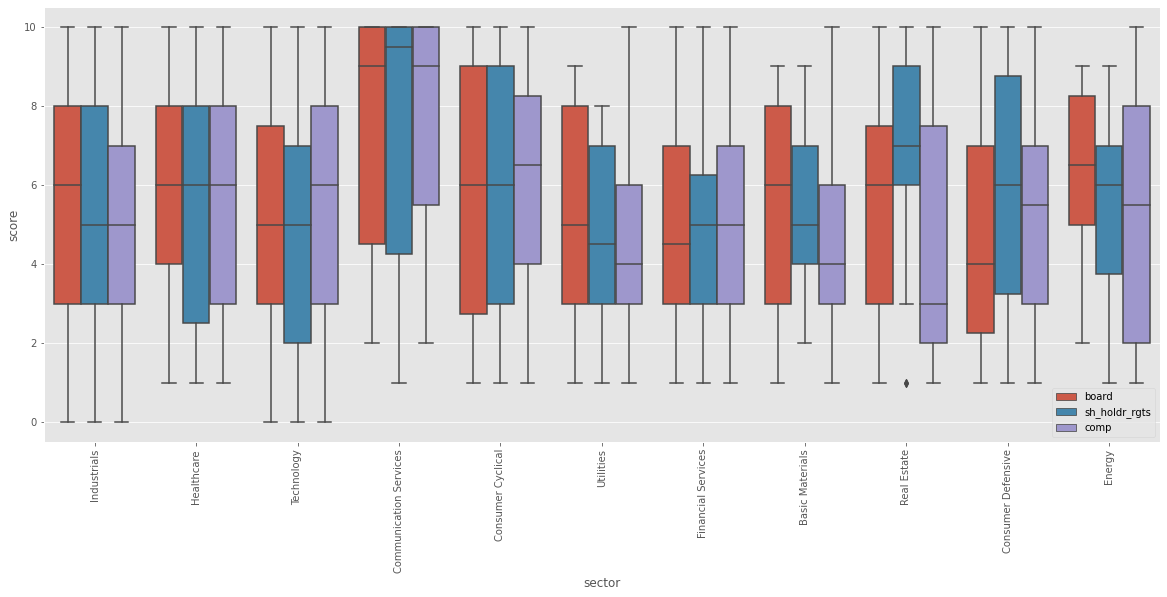

In [14]:
#conclusion: nothing here - not much differentiation across each sector...except for 'communications?'
governance = df[['sector','board','sh_holdr_rgts','comp']]
governance = pd.melt(governance, id_vars=['sector'], value_vars=['board','sh_holdr_rgts','comp'],\
       var_name='governance',value_name='score')
governance

fig_dims = (20,8)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.boxplot(x="sector", y="score",
            hue="governance",
            data=governance)
plt.setp(g.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')